<a href="https://colab.research.google.com/github/MontseFlores07/IAyRN_2025/blob/main/AF8_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Fundamental 8: Redes Neuronales Convolucionales**

Montserrat Guadalupe Flores Flores 2055196 N5

Dylan Yahir Salazar Guardiola 2044839 N4

## Cargar librerías


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

## Cargar datos

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Preprocesamiento de datos

In [3]:
# Redimensionar datos para CNN (canal de color)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

## Selección y entrenamiento del modelo

In [4]:
model = Sequential([
    # Bloque convolucional 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Bloque convolucional 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.35),

    # Capas finales
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Callbacks para mejor entrenamiento
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
]

# Entrenamiento
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 281s 653ms/step - accuracy: 0.8708 - loss: 0.4317 - val_accuracy: 0.3087 - val_loss: 2.7458 - learning_rate: 0.0010
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 272s 644ms/step - accuracy: 0.9791 - loss: 0.0698 - val_accuracy: 0.9880 - val_loss: 0.0400 - learning_rate: 0.0010
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 320s 640ms/step - accuracy: 0.9838 - loss: 0.0510 - val_accuracy: 0.9917 - val_loss: 0.0304 - learning_rate: 0.0010
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 322s 640ms/step - accuracy: 0.9888 - loss: 0.0377 - val_accuracy: 0.9893 - val_loss: 0.0375 - learning_rate: 0.0010
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 324s 645ms/step - accuracy: 0.9907 - loss: 0.0308 - val_accuracy: 0.9927 - val_loss: 0.0255 - learning_rate: 0.0010
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 316s 631ms/step - accuracy: 0.9910 - loss: 0.0292 - val_accuracy: 0.9923 - val_loss: 0.0260 - learning_rate: 0.0010
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 272s 645ms/step - accura

## Prueba del modelo

In [7]:
# Evaluación global
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nExactitud en prueba: {test_acc:.4f}")


Exactitud en prueba: 0.9954


In [11]:
# Predicciones individuales
sample_indices = np.random.choice(len(x_test), 5)
predictions = model.predict(x_test[sample_indices])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


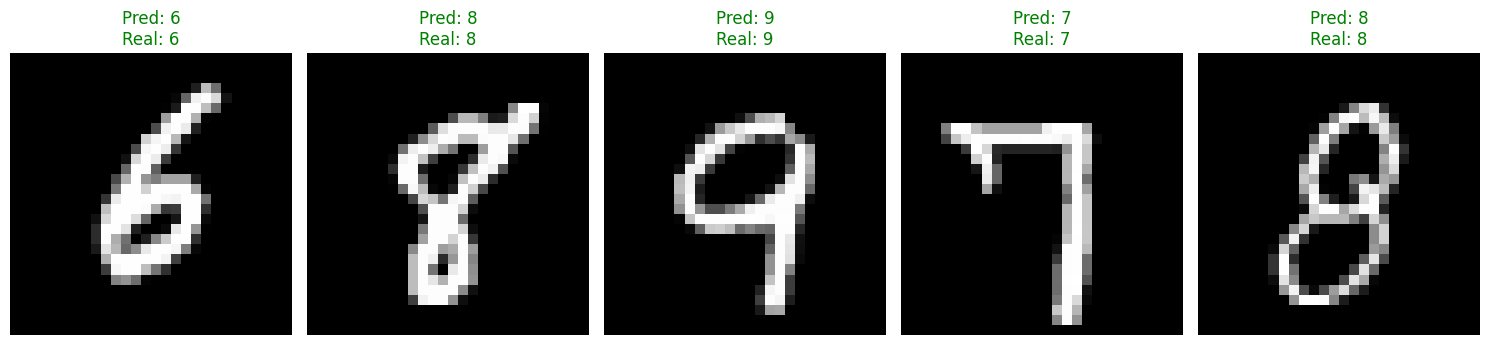

In [12]:
# Visualización de resultados
plt.figure(figsize=(15, 5))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')

    pred_label = np.argmax(predictions[i])
    true_label = y_test[idx]

    plt.title(f"Pred: {pred_label}\nReal: {true_label}", color='green' if pred_label == true_label else 'red')

plt.tight_layout()
plt.show()

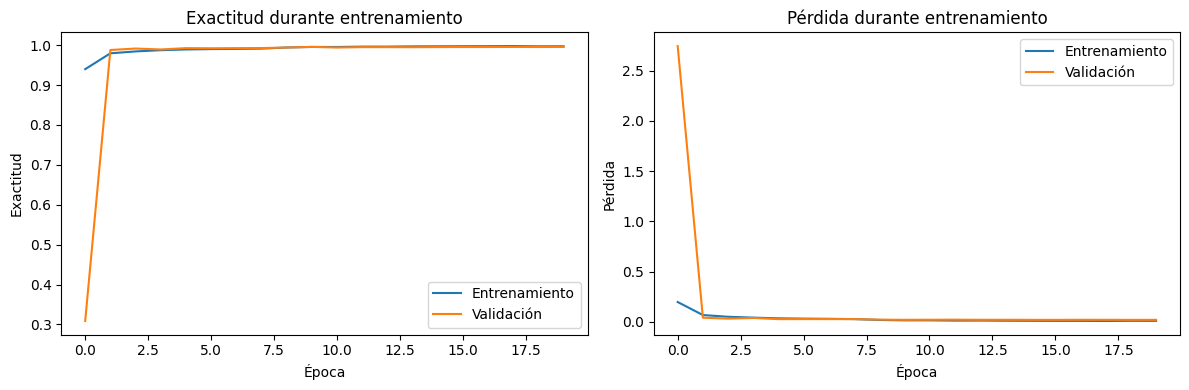

In [13]:
# Gráfica de evolución del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Exactitud durante entrenamiento')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante entrenamiento')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.tight_layout()
plt.show()